In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


**Task 1.1** build 95% confidence intervals for data from the general population with an average of 0 and a standard deviation of 1 ($\mu=0, \sigma=1$) with different sample sizes (10, 50, 100, 500). What conclusion can be drawn from the result? Please justify your answer with the properties of the CPT (see wikipedia).

**Task 1.2** Make calculations similar to point 1.1. What conclusion can be drawn from the result? Justify your answer

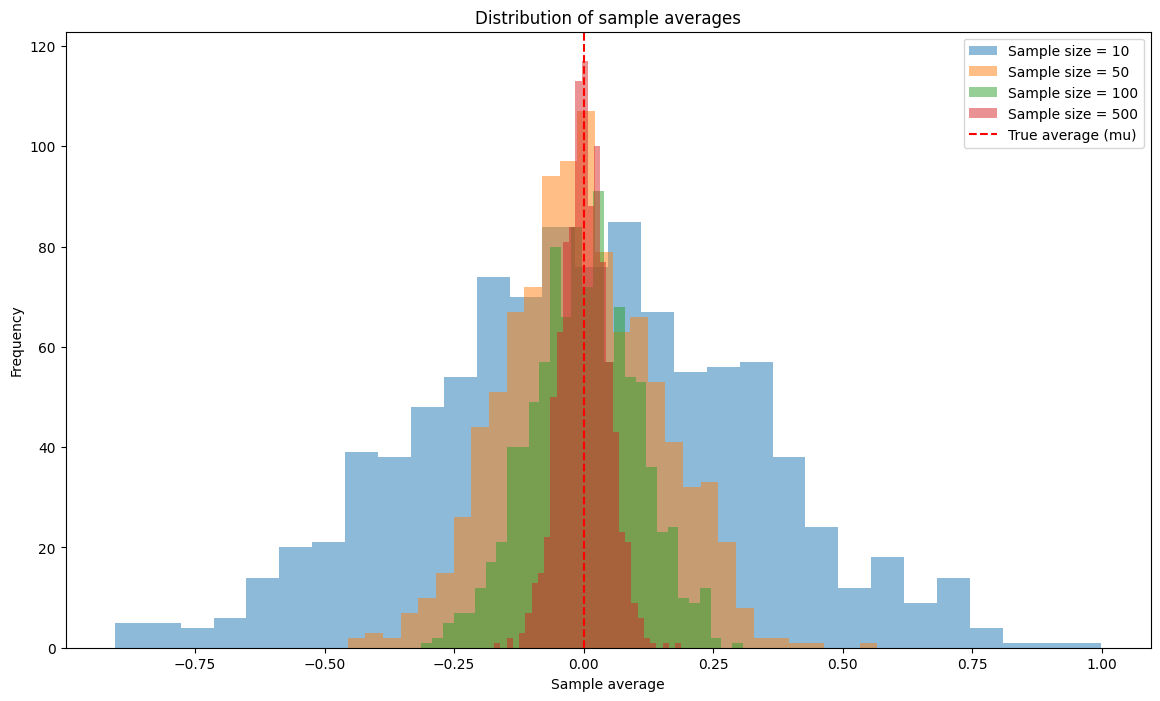

In [66]:
#example from the general population from the standard normal distribution

def demonstrate_central_limit_theorem(sample_sizes, num_samples=1000, mu=0, sigma=1):
    # Dictionary for storing sample averages for different sample sizes    
    sample_means = {n: [] for n in sample_sizes}
    for n in sample_sizes:
        for _ in range(num_samples):
            # Generating a sample of size n from a normal distribution
            sample = np.random.normal(mu, sigma, n)
            # Calculating and saving the sample average
            sample_means[n].append(np.mean(sample))
    
    # Visualization of the distribution of sample averages
    plt.figure(figsize=(14, 8))
    for n, means in sample_means.items():
        plt.hist(means, bins=30, alpha=0.5, label=f'Sample size = {n}')
    
    plt.axvline(x=mu, color='r', linestyle='--', label='True average (mu)')
    plt.xlabel('Sample average')
    plt.ylabel('Frequency')
    plt.title('Distribution of sample averages')
    plt.legend()
    plt.show()

# Calling a function with different sample sizes
demonstrate_central_limit_theorem([10, 50, 100, 500])


#### According to the graph and properties of the CLT, we can say:
As the sample size increases, the distribution of sample averages tends to a normal distribution; 

The average value of the sample average is approaching the average value of the general population; 

Variance of the sample mean: The variance of the sample mean decreases compared to the variance of the general population. It decreases in proportion to the sample size.

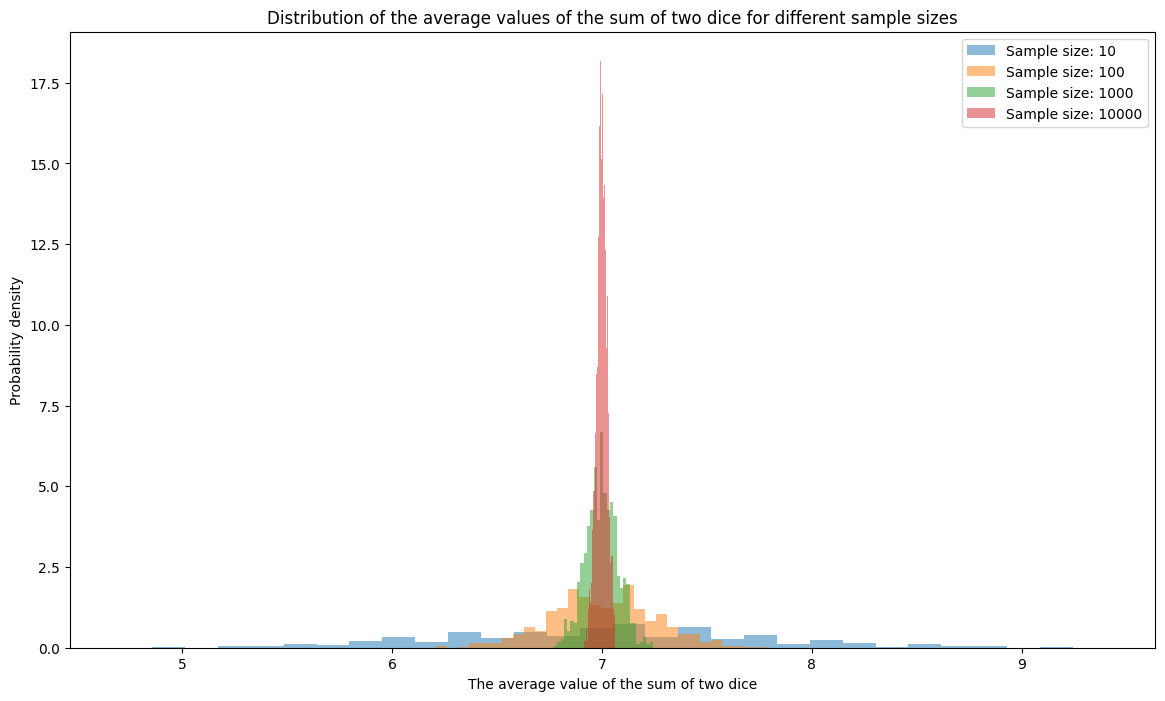

In [67]:
# an example with the data generating process from the Bernoulli trials with the toss of two hexagonal dice

def simulate_dice_rolls_and_plot(sample_sizes, n_simulations=1000):
    plt.figure(figsize=(14, 8))
    
    for sample_size in sample_sizes:
        averages = []
        for _ in range(n_simulations):
            # Generating the sum of the results of two dice rolls
            rolls = np.random.randint(1, 7, size=(sample_size, 2)).sum(axis=1)
            # Calculating and saving the average value for a given simulation
            averages.append(np.mean(rolls))
        
        # Visualization of the distribution of averages
        plt.hist(averages, bins=30, alpha=0.5, label=f'Sample size: {sample_size}', density=True)
    
    plt.xlabel('The average value of the sum of two dice')
    plt.ylabel('Probability density')
    plt.title('Distribution of the average values of the sum of two dice for different sample sizes')
    plt.legend()
    plt.show()

# Simulation and visualization for different sample sizes
simulate_dice_rolls_and_plot([10, 100, 1000, 10000])


#### Based on the graph and the property of the distribution of average values, we can draw conclusions:

This is a distribution that describes the probabilistic characteristics of the averages of all possible random samples from the general population. 

The sum of the values on the two bones will be averaged over a larger number of observations, which will bring the distribution of the sum of the values closer to the normal distribution.

The expected average value of the sum of the values for large sample sizes will be approximately equal
to μ=E(X)+E(Y), where E(X) and E(Y) are the average values on the dice, i.e. μ=3.5+3.5=7.

The standard deviation will decrease with increasing sample size, which makes the estimate of the average value of the sum of values more accurate.

### Task #2: Basic stat.test

<!-- Let's say we conducted a test during which for one group of users we displayed offers available for use on KB, and for another we did not. We chose the average conversion to purchase as a metric. The data is generated, but close to reality)
-->

<!-- Let's have an online store. We conducted a test during which we sent a push with the most profitable products and discount messages to one group of users, and did not send anything to another group of users. After the test, we need to see if it was profitable. As a metric, we took the number of customer purchases 
 -->
Let's say we have an online store. But the audience of our online store is not very adult, people don't have much money. Therefore, we wanted to hold an action in order to attract a more adult population.

After the campaign, we want to check how effective it was. 
* ***The received data***

In [68]:
age_n = np.random.normal(21, 2, 10000)
age_n1 = np.random.normal(40, 5,10000)

/var/folders/9p/2b9k_p8n1_xcx6qqb22xgw780000gn/T/ipykernel_80866/1558539667.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_n,color = 'olivedrab',hist = True, kde = False,ax = ax)
/var/folders/9p/2b9k_p8n1_xcx6qqb22xgw780000gn/T/ipykernel_80866/1558539667.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

Text(0.5, 1.0, 'test')

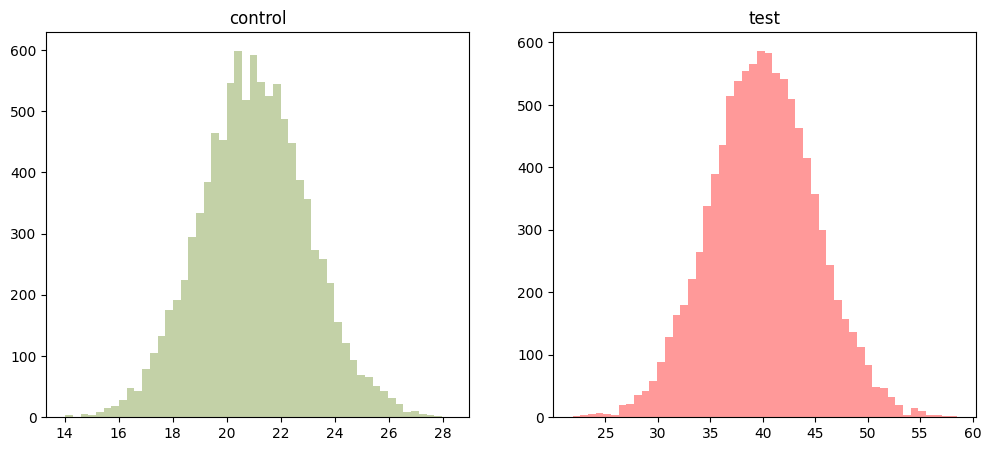

In [69]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(age_n,color = 'olivedrab',hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(age_n1,color = 'red',hist = True, kde = False,ax=ax)
ax.set_title('test')

**Answer the questions:**

- What do we expect?
- What hypotheses should be formulated?
- What level of significance will we fix? What is the significance level ($\alpha$)?
- What should be calculated to test a hypothesis using a t-test?
- Calculate the p-value. Explain every step of your calculations
- What result did you get? Interpret the result from two points of view - statistical and business. Has our campaign worked?
- What else needs to be considered from a business point of view?

1. We expect to attract a more adult audience through the promotion. 
2. H0 - There will be no changes after the promotion; \
   H1 - The number of adult customers has increased after the promotion.
3. Significance level (alpha) In statistics, it is a threshold value that is used to make decisions about accepting or rejecting the null hypothesis in statistical tests. It determines how far the observed data must deviate from the expected values in order for the result to be considered statistically significant. \
In this case, we took &alpha; = 0.05.
4. To do this, we need the difference of the sample averages (man_diff) and the standard error of the difference of the sample averages (sem). Then 
   we use the formula t = man_diff/sem to check the statistical significance of the difference between the averages of the two samples.

In [70]:
mean_a = np.mean(age_n)
mean_b = np.mean(age_n1)
mean_diff = mean_a - mean_b

In [71]:
#the number of items in the selections
n1 = len(age_n)
n2 = len(age_n1)

#dispersions
var_a = np.var(age_n,ddof = 1)
var_b = np.var(age_n1,ddof = 1)

#standard deviations
sd_a = np.sqrt(var_a)
sd_b = np.sqrt(var_b)

#standard error of the mean difference
sem = np.sqrt(sd_a**2/n1 + sd_b**2/n2)

print('Standard error of the mean difference = ',sem)

Standard error of the mean difference =  0.05374616165976288


In [72]:
t = mean_diff/sem
print('t-test =',t)

t-test = -353.080163837374


In [73]:
#degrees of freedom
df = (n1 + n2) - 2
print('df -', df)

#p - value
p = stats.t.cdf(t, df) 

if p > 0.05: 
    print('There is NO statistically significant difference','\nt-test = ',t,'\np-value =',p)
else:
    print('There is a statistically significant difference','\nt-test = ',t,'\np-value =',p)

df - 19998
There is a statistically significant difference 
t-test =  -353.080163837374 
p-value = 0.0


#### 6. Based on the calculated p-value, we reject the H0 hypothesis (There will be no changes) which means that the action worked. More adult customers means more customers with a larger budget, which directly affects the profit of the company (online store).
#### 7. From a business point of view, it is also worth considering the sales funnel (the customer's path to the target action).

### Task #3: Working with a dataset

- Upload [data](https://drive.google.com/file/d/1NVBxPjnUryV_h1pM2ygPczCTb5lUSU8C/view?usp=sharing ), check the number of observations and columns, and the presence of omissions. Make sure that the data types have been read correctly. If necessary, convert the variables to the appropriate types.
- Convert the data and count the number of trips by day. Visualize the result.
- Use aggregated data by day and calculate a moving average with a window of 3. As an answer, specify the received number of rents for 2015-07-09, rounding the value to an integer.
- Calculate the difference between the observed and the values calculated using a moving average. Next, find the standard deviation.
- Determine the boundaries of the 99% confidence interval, add this information to the dataframe.
- Study the abnormally high values and specify the day when the number of rents was the highest. Find the cause of this anomaly.
- Study the abnormally low values, find the day with the least number of rents. Find the cause of this anomaly.

#### Description of the data

- **timestamp**: date and time (accurate to the hour)
- **cnt**: number of bike rentals for this hour
- **t1**: temperature, in °C
- **t2**: the temperature "feels like", in °C
- **hum**: humidity (%)
- **wind_speed**: wind speed, km/h
- **weather_code**: Weather conditions:
  - 1 – clear (SKC)
  - 2 – mostly clear / scattered clouds (SCT)
  - 3 – cloudy / significant clouds (BKN)
  - 4 – cloudy (OVC)
  - 7 – light rain Rain/ light Rain shower/ Light rain 
  - 10 – rain with thunderstorm
  - 26 – snowfall
  - 94 – icy fog (yes, it happens!)
- **isholiday**: is the day a holiday (1 – holiday, 0 – no)
- **isweekend**: is the day a weekend (1 – weekend, 0 – No)
- **season**: meteorological season (0 – spring, 1 – summer, 2 – autumn, 3 – winter)

In [74]:
dataframe = pd.read_csv('london.csv')
dataframe.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [75]:
print('Size of dataframe', dataframe.shape)
print()
print('Missing values') 
print(dataframe.isnull().sum())
print()
print('Data types') 
print(dataframe.dtypes)

Size of dataframe (17414, 10)

Missing values
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Data types
timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [76]:
# Conversion to the right data types
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])
dataframe['weather_code'] = dataframe['weather_code'].astype(int)
dataframe['is_holiday'] = dataframe['is_holiday'].astype(int)
dataframe['is_weekend'] = dataframe['is_weekend'].astype(int)
dataframe['season'] = dataframe['season'].astype(int)
print('Data types') 
print(dataframe.dtypes)

Data types
timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object


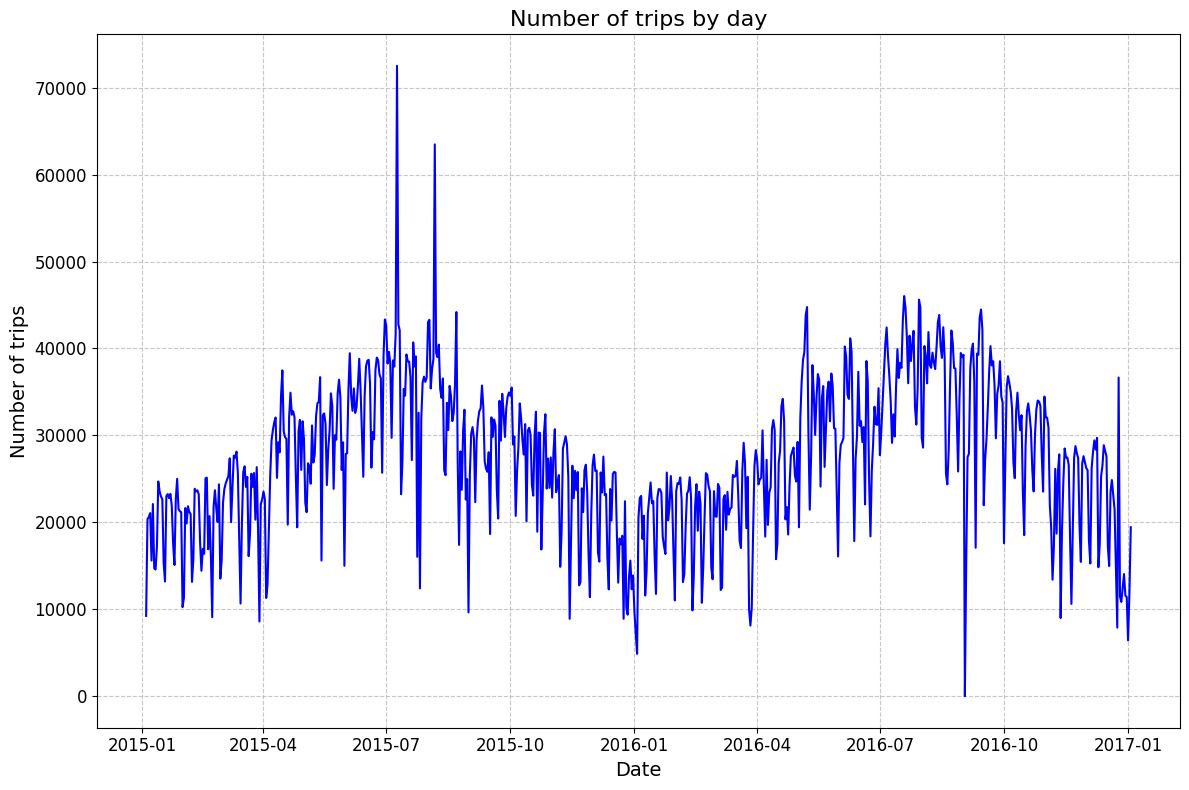

In [77]:
# Grouping and visualizing data on the number of trips by day
df_grouped = dataframe.groupby(pd.Grouper(key='timestamp', freq='D')).sum()
plt.figure(figsize=(12, 8))
plt.plot(df_grouped.index, df_grouped['cnt'], linestyle='-', color='b')
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Number of trips by day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout() 
plt.show()

In [78]:
# Calculate the moving average with a window of 3
rolling_mean = df_grouped['cnt'].rolling(window=3).mean()

# Let's see the value for the date 2015-07-09
print("The moving average for 2015-07-09:", int(rolling_mean['2015-07-09']))

The moving average for 2015-07-09: 50705


In [79]:
# Calculate the difference between the observed values and the values of the moving average
difference = df_grouped['cnt'] - rolling_mean
print("The difference between the observed values and the values of the moving average:\n", difference.head())
print()

# Finding the standard deviation of the difference
std_deviation = np.std(difference)
print("The standard deviation of the difference:", std_deviation)


The difference between the observed values and the values of the moving average:
 timestamp
2015-01-04            NaN
2015-01-05            NaN
2015-01-06    3873.333333
2015-01-07     381.000000
2015-01-08   -3491.666667
Freq: D, Name: cnt, dtype: float64

The standard deviation of the difference: 4558.58664111794


In [80]:
# Finding the quantiles of the difference
quantile_005 = difference.quantile(0.005)
quantile_995 = difference.quantile(0.995)
print("Limits of the 99% confidence interval:", quantile_005, quantile_995)
print()

# Adding information about the boundaries of the confidence interval to the Data Frame
df_grouped['lower_bound'] = rolling_mean - quantile_995
df_grouped['upper_bound'] = rolling_mean - quantile_005
print(df_grouped.tail())

Limits of the 99% confidence interval: -13489.733333333332 10958.173333333383

              cnt     t1     t2     hum  wind_speed  weather_code  is_holiday  \
timestamp                                                                       
2016-12-30  11566   78.5   25.5  2368.5       216.0           105           0   
2016-12-31  11424  178.5  121.0  2183.0       319.5            98           0   
2017-01-01   6421  168.0  106.5  2122.5       339.0           150           0   
2017-01-02  11823   89.5   22.5  1995.5       268.0            29          24   
2017-01-03  19436   81.5  -15.0  1953.5       454.5            56           0   

            is_weekend  season  lower_bound   upper_bound  
timestamp                                                  
2016-12-30           0      72  1723.826667  26171.733333  
2016-12-31          24      72  1389.160000  25837.066667  
2017-01-01          24      72 -1154.506667  23293.400000  
2017-01-02           0      72 -1068.840000  23379.06

In [81]:
# The row with the largest number of rents
print(df_grouped.loc[df_grouped['cnt'].idxmax()])

cnt             72504.000000
t1                427.000000
t2                421.000000
hum              1175.500000
wind_speed        311.500000
weather_code       28.000000
is_holiday          0.000000
is_weekend          0.000000
season             24.000000
lower_bound     39746.826667
upper_bound     64194.733333
Name: 2015-07-09 00:00:00, dtype: float64


#### Due to outliers in this row, namely in columns t1, t2, hum, wind_speed, weather_code, season, the number of rentals is mistakenly large. The main reason for the anomaly is an error in the data

In [82]:
# The row with the least number of rents
print(df_grouped.loc[df_grouped['cnt'].idxmin()])

cnt                 0.000000
t1                  0.000000
t2                  0.000000
hum                 0.000000
wind_speed          0.000000
weather_code        0.000000
is_holiday          0.000000
is_weekend          0.000000
season              0.000000
lower_bound     15128.160000
upper_bound     39576.066667
Name: 2016-09-02 00:00:00, dtype: float64


#### Due to outliers in this row, namely in columns t1, t2, htm, wind_speed, weather_code, the number of rents is mistakenly large.The main reason for the anomaly is an error in the data

### Task #4: Basic stat.test 2.0

Under the conditions of a random sample of $n=100$ observations, we obtained that the average value for the sample is $\bar{X}=18$, and the sample standard deviation is $\hat{s_{X}}=2.5$. Check the null hypothesis $H_0: \{E_x=20\}$ against the two-way alternative.

In [83]:
from scipy.stats import t

# Significance level
a= 0.05

# The value of the mean for the null hypothesis
mu_0 = 20

# Values from the sample
sample_mean = 18
sample_std_dev = 2.5
n = 100

# Degrees of freedom
df = n - 1

# Calculating t-stat
t_statistic = (sample_mean - mu_0) / (sample_std_dev / (n**0.5))

# Calculating critical value
t_critical = t.ppf(1 - a / 2, df)

print("t-stat:", t_statistic)
print("Critical value:", t_critical)

if abs(t_statistic) > t_critical:
    print("Rejecting the null hypothesis")
else:
    print("Accepting the null hypothesis")

t-stat: -8.0
Critical value: 1.9842169515086827
Rejecting the null hypothesis
